 ## 1.Importing libraries

In [2]:
# Importing necessary libraries to conduct our analysis
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima;
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML,display

warnings.filterwarnings("ignore")

In [3]:
#Reading the dataset into object 'df' using pandas:
df= pd.read_csv('sriaqi.csv',parse_dates=True)
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Colombo,2017-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Colombo,2017-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Colombo,2017-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Colombo,2017-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Colombo,2017-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,21930.000000,15453.000000,22986.000000,23002.000000,22176.000000,16372.000000,24258.000000,22675.000000,22559.000000,20932.000000,18664.000000,9412.000000,21937.000000
mean,71.828907,125.492380,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908
std,67.161387,94.179918,23.081236,25.158322,32.695931,27.109244,7.385259,19.087561,21.388968,16.699933,21.137700,6.644018,146.143064
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,31.450000,60.990000,5.930000,11.850000,13.110000,9.197500,0.530000,5.560000,19.010000,0.130000,0.670000,0.120000,85.000000
50%,52.220000,100.950000,10.150000,21.830000,24.300000,17.820000,0.930000,9.120000,30.890000,0.980000,2.850000,0.820000,124.000000
75%,85.655000,158.460000,20.830000,37.890000,42.102500,32.600000,1.530000,15.595000,45.370000,2.850000,8.830000,3.232500,226.000000
max,949.990000,1000.000000,351.300000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


## 2. Data Preprocessing

<AxesSubplot:>

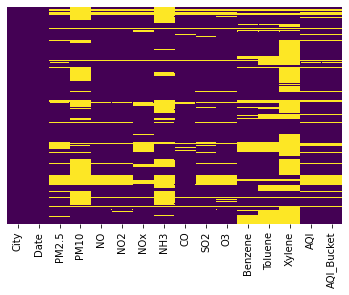

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
print(df.isnull().sum())

City              0
Date              0
PM2.5          4289
PM10          10766
NO             3233
NO2            3217
NOx            4043
NH3            9847
CO             1961
SO2            3544
O3             3660
Benzene        5287
Toluene        7555
Xylene        16807
AQI            4282
AQI_Bucket     4282
dtype: int64


In [8]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

Xylene        64.102369
PM10          41.061825
NH3           37.556734
Toluene       28.814982
Benzene       20.164766
PM2.5         16.358366
AQI_Bucket    16.331668
AQI           16.331668
NOx           15.420115
O3            13.959342
SO2           13.516915
NO            12.330753
NO2           12.269728
CO             7.479309
Date           0.000000
City           0.000000
dtype: float64

In [9]:

df.iloc[:, 1:13] = df.groupby("City").transform(lambda x: x.fillna(x.mean()))

In [10]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Colombo,2017-01-01,69.659932,117.139284,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Colombo,2017-01-02,69.659932,117.139284,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Colombo,2017-01-03,69.659932,117.139284,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Colombo,2017-01-04,69.659932,117.139284,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Colombo,2017-01-05,69.659932,117.139284,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26214,Tangalle,2022-04-28,14.130000,34.270000,5.60,8.98,12.48,5.65,0.49,5.50,42.41,NaN,NaN,NaN,63.0,Satisfactory
26215,Tangalle,2022-04-29,23.840000,44.320000,6.27,10.01,13.80,5.73,0.44,5.62,44.55,NaN,NaN,NaN,60.0,Satisfactory
26216,Tangalle,2022-04-30,18.540000,34.480000,6.17,9.67,13.35,5.93,0.51,5.52,38.97,NaN,NaN,NaN,57.0,Satisfactory
26217,Tangalle,2022-05-01,20.570000,48.190000,6.28,9.52,13.56,5.84,0.46,5.32,39.23,NaN,NaN,NaN,57.0,Satisfactory


<AxesSubplot:>

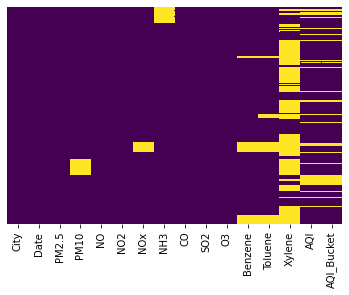

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
df.iloc[:, 1:13]=df.fillna(df.mean())
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Colombo,2017-01-01,69.659932,117.139284,0.92,18.22,17.15,25.808396,0.92,27.64,133.36,0.000000,0.020000,0.00,NaN,NaN
1,Colombo,2017-01-02,69.659932,117.139284,0.97,15.69,16.46,25.808396,0.97,24.55,34.06,3.680000,5.500000,3.77,NaN,NaN
2,Colombo,2017-01-03,69.659932,117.139284,17.40,19.30,29.70,25.808396,17.40,29.07,30.70,6.800000,16.400000,2.25,NaN,NaN
3,Colombo,2017-01-04,69.659932,117.139284,1.70,18.48,17.97,25.808396,1.70,18.59,36.08,4.430000,10.140000,1.00,NaN,NaN
4,Colombo,2017-01-05,69.659932,117.139284,22.10,21.42,37.76,25.808396,22.10,39.33,39.31,7.010000,18.890000,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26214,Tangalle,2022-04-28,14.130000,34.270000,5.60,8.98,12.48,5.650000,0.49,5.50,42.41,3.284503,8.291208,NaN,63.0,Satisfactory
26215,Tangalle,2022-04-29,23.840000,44.320000,6.27,10.01,13.80,5.730000,0.44,5.62,44.55,3.284503,8.291208,NaN,60.0,Satisfactory
26216,Tangalle,2022-04-30,18.540000,34.480000,6.17,9.67,13.35,5.930000,0.51,5.52,38.97,3.284503,8.291208,NaN,57.0,Satisfactory
26217,Tangalle,2022-05-01,20.570000,48.190000,6.28,9.52,13.56,5.840000,0.46,5.32,39.23,3.284503,8.291208,NaN,57.0,Satisfactory


<AxesSubplot:>

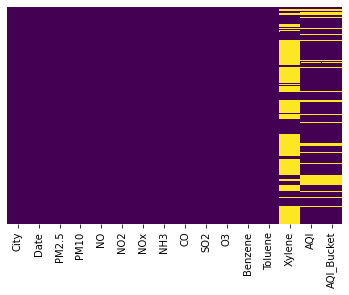

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Satisfactory"
    elif x > 100 and x <= 200:
        return "Moderate"
    elif x > 200 and x <= 300:
        return "Poor"
    elif x > 300 and x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return '0'
    
df["AQI_Bucket"] = df["AQI_Bucket"].fillna(df["AQI"].apply(lambda x: get_AQI_bucket(x)))


<AxesSubplot:>

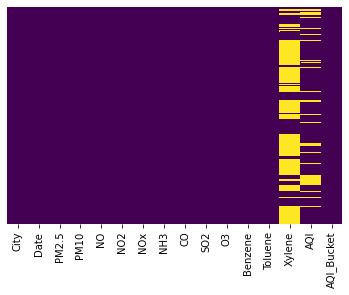

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
df=df[['City','Date','AQI','AQI_Bucket']]

In [17]:
cities=pd.unique(df['City'])
column1= cities+'_AQI'
column2=cities+'_AQI_Bucket'
columns=[*column1,*column2]

In [18]:
df.tail(5)

,City,Date,AQI,AQI_Bucket
26214,Tangalle,2022-04-28,63.0,Satisfactory
26215,Tangalle,2022-04-29,60.0,Satisfactory
26216,Tangalle,2022-04-30,57.0,Satisfactory
26217,Tangalle,2022-05-01,57.0,Satisfactory
26218,Tangalle,2022-05-02,82.0,Satisfactory


In [19]:
final_df=pd.DataFrame(index=np.arange('2017-01-01','2022-05-03',dtype='datetime64[D]'),columns=column1)
for city,i in zip(cities,final_df.columns):
    n=len(np.array(df[df['City']==city]['AQI']))
    final_df[i][-n:]=np.array(df[df['City']==city]['AQI'])

In [20]:
final_df=final_df.astype('float64')
final_df=final_df.resample(rule='MS').mean()

In [21]:
final_df.tail()

,Colombo_AQI,Jaffna_AQI,Kandy_AQI,Digana_AQI,Trincomalee_AQI,Ambilipitiya_AQI,Nuwara Eliya_AQI,Battaramulla_AQI,Badulla_AQI,Vavniya_AQI,...,Rathnapura_AQI,Dambulla_AQI,Ambalangoda_AQI,Monaragala_AQI,Anuradhapura_AQI,Ella_AQI,Galle_AQI,Nugegoda_AQI,Padukka_AQI,Tangalle_AQI
2022-01-01,294.111111,NaN,88.032258,104.806452,95.322581,160.516129,94.064516,87.516129,308.451613,136.857143,...,112.451613,162.935484,156.111111,216.935484,272.645161,168.645161,262.838710,68.619048,301.413793,78.258065
2022-02-01,552.214286,NaN,67.178571,129.538462,96.535714,128.428571,93.642857,78.357143,266.357143,96.250000,...,125.785714,166.500000,121.607143,198.821429,219.142857,158.000000,200.928571,95.280000,194.333333,87.285714
2022-03-01,286.666667,66.105263,52.419355,85.033333,91.612903,110.551724,57.096774,70.677419,137.870968,84.964286,...,102.225806,167.750000,128.266667,124.677419,136.000000,108.645161,161.741935,65.709677,116.916667,76.548387
2022-04-01,121.300000,40.300000,44.833333,57.333333,68.766667,113.181818,43.896552,63.166667,111.433333,69.433333,...,84.133333,122.100000,79.600000,72.233333,106.800000,74.366667,130.766667,84.200000,133.068966,57.500000
2022-05-01,131.000000,19.500000,55.000000,105.500000,68.000000,124.000000,56.500000,67.500000,136.000000,89.000000,...,147.500000,107.000000,56.000000,61.500000,82.500000,66.000000,118.000000,NaN,110.000000,69.500000


In [22]:
final_df['Srilankan_AQI']=final_df.mean(axis=1)

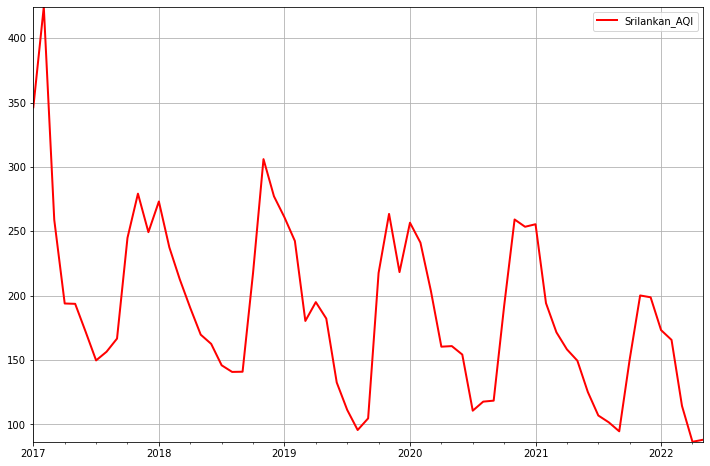

In [23]:
ax=final_df[['Srilankan_AQI']].plot(figsize=(12,8),grid=True,lw=2,color='Red')
ax.autoscale(enable=True, axis='both', tight=True)

In [24]:
df_2021=final_df['2021-01-01':'2022-01-01']
df_2021.head()

,Colombo_AQI,Jaffna_AQI,Kandy_AQI,Digana_AQI,Trincomalee_AQI,Ambilipitiya_AQI,Nuwara Eliya_AQI,Battaramulla_AQI,Badulla_AQI,Vavniya_AQI,...,Dambulla_AQI,Ambalangoda_AQI,Monaragala_AQI,Anuradhapura_AQI,Ella_AQI,Galle_AQI,Nugegoda_AQI,Padukka_AQI,Tangalle_AQI,Srilankan_AQI
2021-01-01,755.516129,NaN,218.612903,94.633333,116.806452,NaN,95.258065,131.000000,365.741935,NaN,...,324.612903,NaN,360.838710,315.516129,165.516129,405.290323,NaN,289.400000,128.161290,255.406135
2021-02-01,560.535714,NaN,114.464286,94.892857,106.250000,NaN,102.923077,118.071429,258.178571,NaN,...,187.214286,NaN,266.071429,243.071429,149.821429,296.107143,NaN,322.555556,88.428571,194.082687
2021-03-01,601.741935,NaN,79.967742,99.733333,122.129032,NaN,156.000000,101.419355,197.354839,NaN,...,148.413793,NaN,157.774194,217.645161,123.483871,214.032258,NaN,189.888889,88.838710,171.396266
2021-04-01,633.518519,NaN,78.133333,112.000000,124.300000,NaN,143.333333,87.533333,219.400000,NaN,...,117.758621,NaN,86.800000,217.700000,98.066667,151.100000,NaN,142.160000,69.933333,158.172434
2021-05-01,412.769231,NaN,106.777778,113.258065,105.387097,NaN,157.333333,103.612903,235.838710,NaN,...,130.555556,NaN,88.548387,184.096774,87.870968,170.806452,NaN,130.413793,75.419355,149.367623


In [25]:
df_2021.isna().sum()

Colombo_AQI          0
Jaffna_AQI          13
Kandy_AQI            1
Digana_AQI           0
Trincomalee_AQI      0
Ambilipitiya_AQI     8
Nuwara Eliya_AQI     0
Battaramulla_AQI     0
Badulla_AQI          0
Vavniya_AQI         12
Ambalantota_AQI      0
Matara_AQI           1
Negombo_AQI          0
Rathnapura_AQI       0
Dambulla_AQI         1
Ambalangoda_AQI     12
Monaragala_AQI       0
Anuradhapura_AQI     0
Ella_AQI             0
Galle_AQI            0
Nugegoda_AQI         8
Padukka_AQI          0
Tangalle_AQI         0
Srilankan_AQI        0
dtype: int64

In [26]:
df_2021=df_2021.drop(['Jaffna_AQI','Vavniya_AQI','Ambalangoda_AQI'],axis=1)

In [27]:
AQI_2021=df_2021.mean(axis=0)

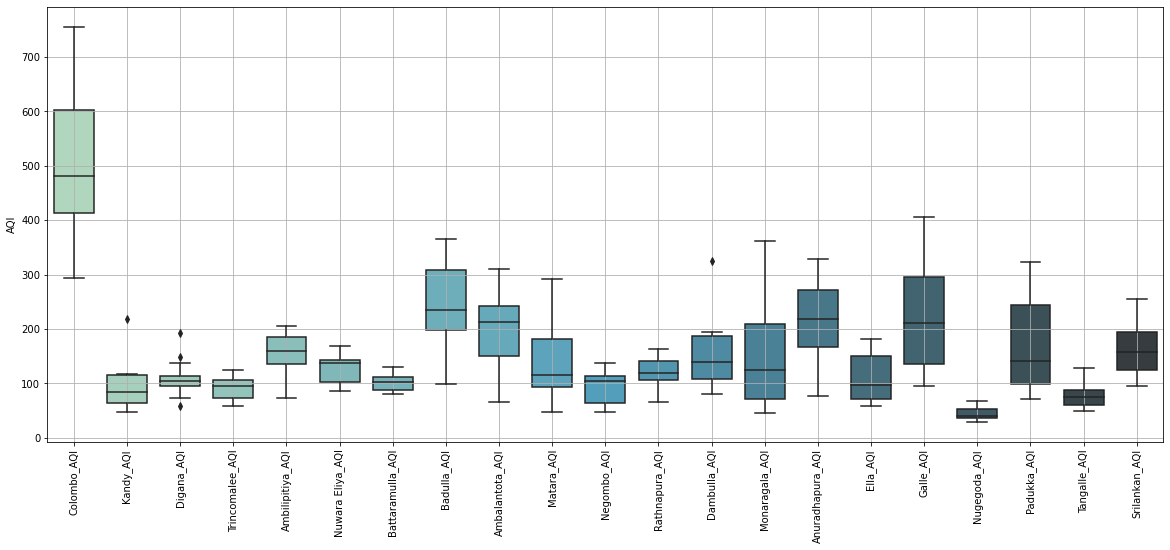

In [28]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
bplot = sns.boxplot( data=df_2021,  width=0.75,palette="GnBu_d")
plt.ylabel('AQI');
bplot.grid(True)

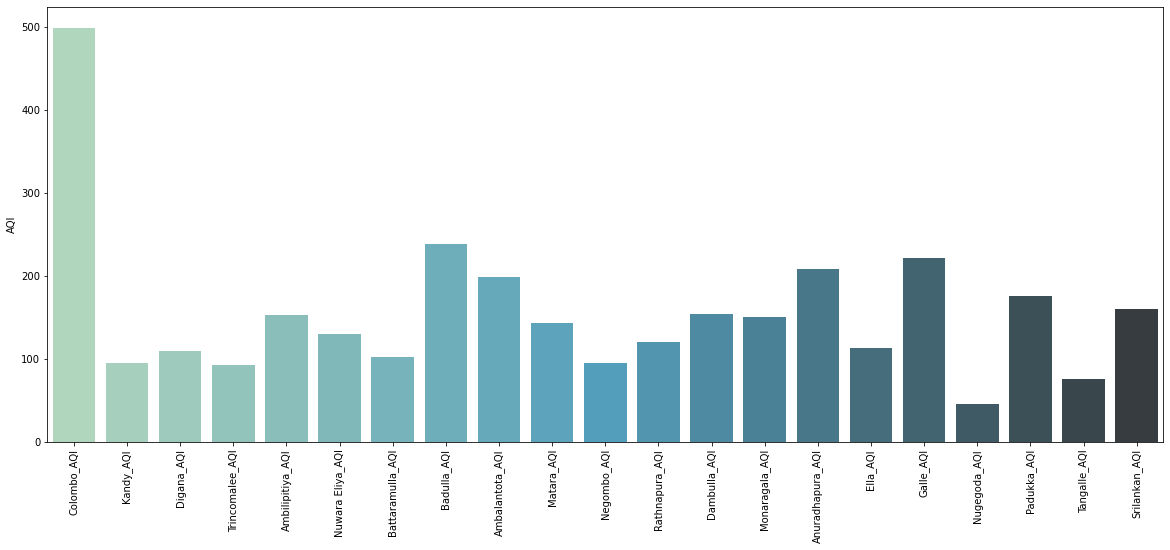

In [29]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
plt.ylabel('AQI')
bplot=sns.barplot(AQI_2021.index, AQI_2021.values,palette="GnBu_d")


In [68]:
!pip install statsmodels

## 3 .Analysing and forecasting of AQI values:

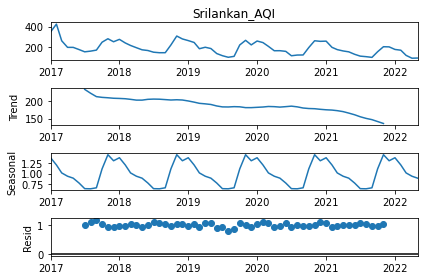

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
Srilankan_AQI=final_df['Srilankan_AQI']
result=seasonal_decompose(Srilankan_AQI,model='multiplicative')
result.plot();

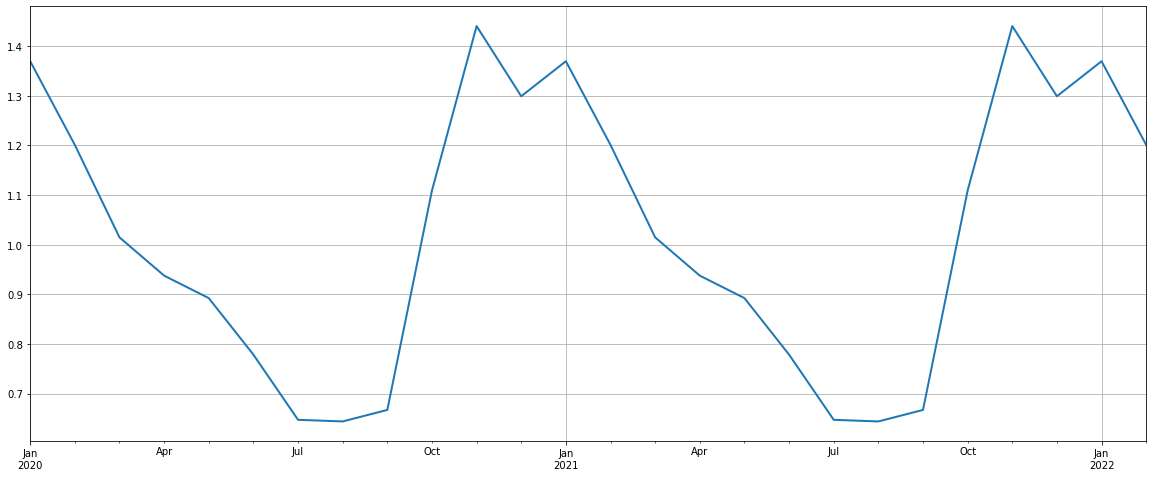

In [31]:
from matplotlib import dates
ax=result.seasonal.plot(xlim=['2020-01-01','2022-02-10'],figsize=(20,8),lw=2)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

## 4. Forecasting: 
We will be using three methods for forecasting values of AQI for Sri Lanka, namely,  SARIMA, RNN using LSTM and facebook prophet.

### 4.1 SARIMA(Seasonal Autoregressive Integrated Moving Average)

In [33]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
!pip install pmdarima;
from pmdarima import auto_arima;



### 4.1 SARIMA(Seasonal Autoregressive Integrated Moving Average)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
!pip install pmdarima;
from pmdarima import auto_arima;



In [34]:
auto_arima(y=Srilankan_AQI,start_p=0,start_P=0,start_q=0,start_Q=0,seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   65
Model:             SARIMAX(0, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -308.316
Date:                            Thu, 17 Nov 2022   AIC                            628.633
Time:                                    10:48:23   BIC                            641.586
Sample:                                01-01-2017   HQIC                           633.736
                                     - 05-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0388      0.066      0.591      0.554      -0.090       0.168
ma.L2         -0.8926      0.086    -10.331      0.000      -1.062      -0.723
ar.S.L12       0.9132      0.071     12.878      0.000       0.774       1.052
ma.S.L12      -0.7695      0.232     -3.321      0.001      -1.224      -0.315
ma.S.L24       0.3822      0.242      1.582      0.114      -0.091       0.856
sigma2       654.5557    159.269      4.110      0.000     342.394     966.718
===================================================================================
Ljung-Box (L1) (Q):                   1.92   Jarque-Bera (JB):                 0.54
Prob(Q):                              0.17   Prob(JB):                         0.76
Heteroskedasticity (H):               0.55   Skew:                            -0.22
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
len(Srilankan_AQI)

65

In [36]:
#dividing into train and test:
train=Srilankan_AQI[:41]
test=Srilankan_AQI[42:54]

In [37]:
# Forming the model:
model=SARIMAX(train,order=(1,1,1),seasonal_order=(1,0,1,12),)
results=model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                      Srilankan_AQI   No. Observations:                   41
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -204.053
Date:                            Thu, 17 Nov 2022   AIC                            418.106
Time:                                    10:48:35   BIC                            426.550
Sample:                                01-01-2017   HQIC                           421.159
                                     - 05-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6958      0.206     -3.372      0.001      -1.100      -0.291
ma.L1          0.9992      1.543      0.648      0.517      -2.025       4.023
ar.S.L12       0.9969      0.232      4.305      0.000       0.543       1.451
ma.S.L12      -0.9173      2.949     -0.311      0.756      -6.698       4.864
sigma2      1045.7620   2719.732      0.385      0.701   -4284.815    6376.339
===================================================================================
Ljung-Box (L1) (Q):                   1.85   Jarque-Bera (JB):                14.07
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               0.25   Skew:                            -0.54
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
#Obtaining predicted values:
predictions = results.predict(start=42, end=53, typ='levels').rename('Predictions')

<AxesSubplot:>

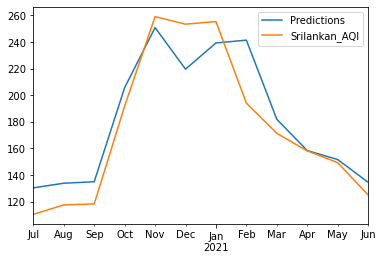

In [39]:
#Plotting predicted values against the true values:
predictions.plot(legend=True)
test.plot(legend=True)

In [40]:
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(predictions,test))
print('RMSE = ',RMSE)
print('Mean AQI',test.mean())

RMSE =  20.52469779007035
Mean AQI 175.35343879931807


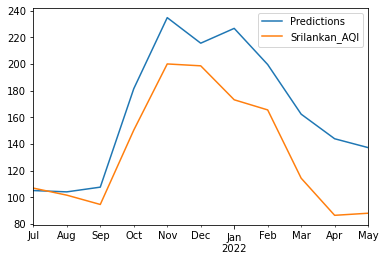

In [41]:
#dividing into train and test:
train=Srilankan_AQI[:42]
test=Srilankan_AQI[54:]
# Forming the model:
model=SARIMAX(train,order=(1,1,1),seasonal_order=(1,0,1,12),)
results=model.fit()
results.summary()
#Obtaining predicted values:
predictions = results.predict(start=54, end=64, typ='levels').rename('Predictions')
#Plotting predicted values against the true values:
predictions.plot(legend=True)
test.plot(legend=True);

In [42]:
#Finding RMSE:
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(predictions,test))
print('RMSE = ',RMSE)
print('Mean AQI',test.mean())

RMSE =  36.603401675223935
Mean AQI 134.44662233910168


### Predicting into the future:

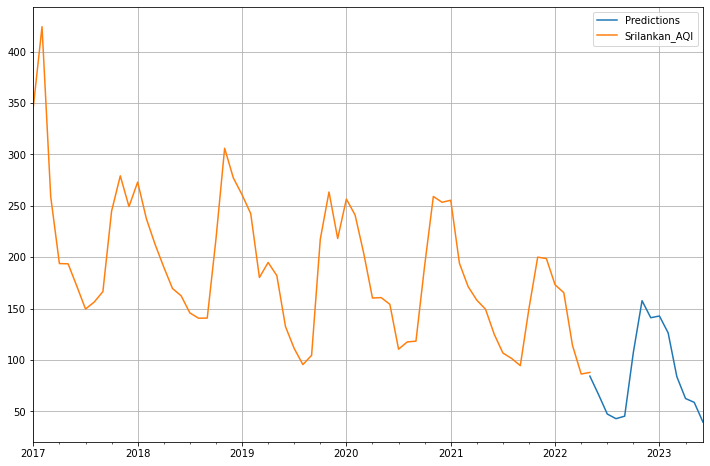

In [44]:
# Forming the model:
model=SARIMAX(Srilankan_AQI,order=(1,1,1),seasonal_order=(1,0,1,12))
results=model.fit()
results.summary()
#Obtaining predicted values:
predictions = results.predict(start=64, end=77, typ='levels').rename('Predictions')
#Plotting predicted values against the true values:
predictions.plot(legend=True)
Srilankan_AQI.plot(legend=True,figsize=(12,8),grid=True);

In [45]:
results.predict

<bound method MLEResults.predict of <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000020F48504400>>

### 4.2 Facebook Prophet:

In [46]:
from fbprophet import Prophet

In [47]:
#Formatting necessary to Prophet:
Srilankan_AQI=Srilankan_AQI.reset_index()
Srilankan_AQI.columns=['ds','y']

In [48]:
import pystan

### Creating and fitting the model:

In [49]:
# Forming test/train data:
train=Srilankan_AQI[:-24]
test=Srilankan_AQI[-24:-12]
m = Prophet(seasonality_mode='multiplicative')
m.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Forecasting:

In [50]:
future = m.make_future_dataframe(periods=12,freq = 'MS')

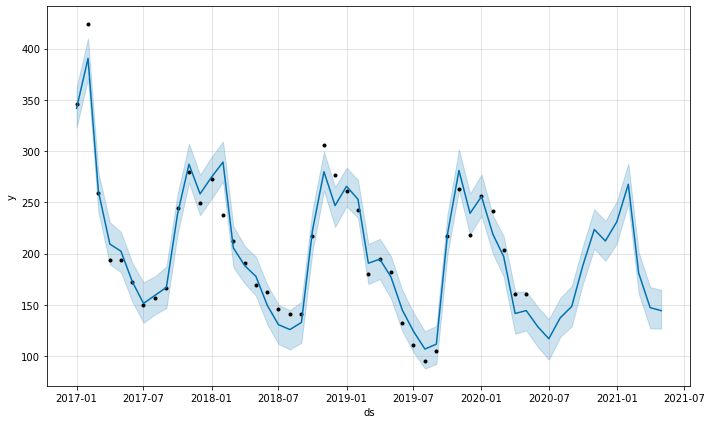

In [51]:
forecast = m.predict(future)
m.plot(forecast);

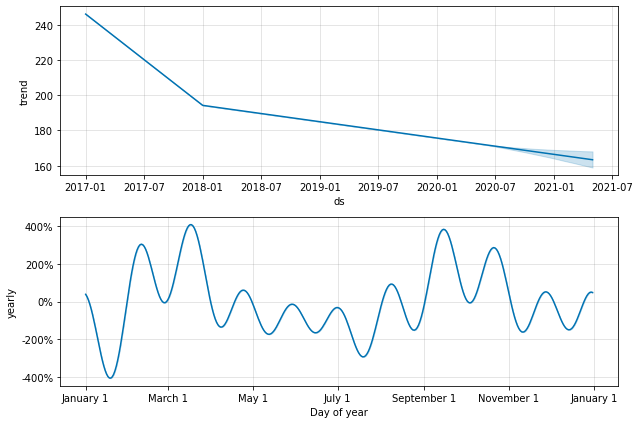

In [52]:
m.plot_components(forecast);

### 4.3 Recurring Neural Networks(RNN):

In [53]:
Srilankan_AQI=Srilankan_AQI.set_index('ds')

In [54]:
train=Srilankan_AQI[:-24]
test=Srilankan_AQI[-24:-12]

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [56]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [57]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 24
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [58]:
#To give an idea of what generator file holds:
X,y = generator[0]

In [59]:
# We can see that the x array gives the list of values that we are going to predict y of:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.76284705 1.         0.49691035 0.29903153 0.29824159 0.23222204
 0.1645422  0.1850118  0.21612088 0.45418554 0.55861081 0.46764203
 0.54013103 0.43178098 0.35597385 0.28861376 0.22534383 0.20357138
 0.15299045 0.13731081 0.13777679 0.37101945 0.64025057 0.55240795]
Predict this y: 
 [[0.50288016]]


In [60]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [61]:
# defining the model:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Fitting the model with the generator object:
model.fit_generator(generator,epochs=250)

Epoch 1/250
17/17 [==============================] - 3s 11ms/step - loss: 0.0631
Epoch 2/250
17/17 [==============================] - 0s 5ms/step - loss: 0.0381
Epoch 3/250
17/17 [==============================] - 0s 5ms/step - loss: 0.0294
Epoch 4/250
17/17 [==============================] - 0s 5ms/step - loss: 0.0292
Epoch 5/250
17/17 [==============================] - 0s 5ms/step - loss: 0.0288
Epoch 6/250
17/17 [==============================] - 0s 5ms/step - loss: 0.0282
Epoch 7/250
17/17 [==============================] - 0s 5ms/step - loss: 0.0285
Epoch 8/250
17/17 [==============================] - 0s 5ms/step - loss: 0.0294
Epoch 9/250
17/17 [==============================] - 0s 5ms/step - loss: 0.0291
Epoch 10/250
17/17 [==============================] - 0s 5ms/step - loss: 0.0284
Epoch 11/250
17/17 [==============================] - 0s 5ms/step - loss: 0.0283
Epoch 12/250
17/17 [==============================] - 0s 5ms/step - loss: 0.0290
Epoch 13/250
17/17 [================

17/17 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 203/250
17/17 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 204/250
17/17 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 205/250
17/17 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 206/250
17/17 [==============================] - 0s 6ms/step - loss: 0.0025
Epoch 207/250
17/17 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 208/250
17/17 [==============================] - 0s 5ms/step - loss: 0.0084
Epoch 209/250
17/17 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 210/250
17/17 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 211/250
17/17 [==============================] - 0s 5ms/step - loss: 0.0029
Epoch 212/250
17/17 [==============================] - 0s 5ms/step - loss: 0.0026
Epoch 213/250
17/17 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 214/250
17/17 [=========

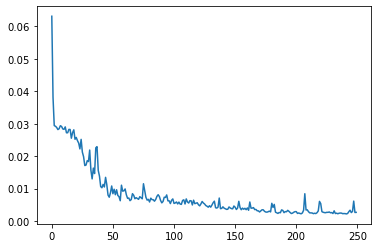

In [64]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [65]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    
    current_pred = model.predict(current_batch)[0]
    
    
    test_predictions.append(current_pred) 
    
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 17ms/step


In [66]:
true_predictions = scaler.inverse_transform(test_predictions)

In [67]:
test['Predictions'] = true_predictions

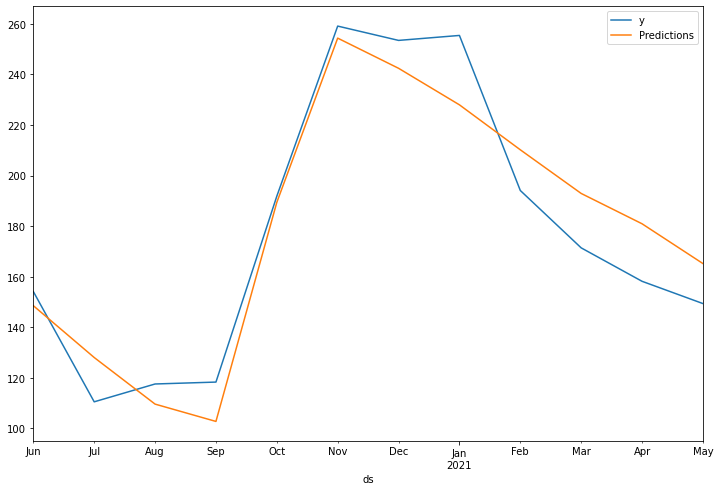

In [68]:
test.plot(figsize=(12,8))
plt.plot(true_predictions)

In [69]:
RMSE=np.sqrt(mean_squared_error(test['y'],test['Predictions']))
print('RMSE = ',RMSE)
print('Srlankan_AQI=',Srilankan_AQI['y'].mean())

RMSE =  15.910040106827083
Srlankan_AQI= 188.7777598526104


In [70]:
scaler.fit(Srilankan_AQI)
scaled_Srilankan_AQI=scaler.transform(Srilankan_AQI)

In [71]:
generator = TimeseriesGenerator(scaled_Srilankan_AQI, scaled_Srilankan_AQI, length=n_input, batch_size=1)

In [72]:
model.fit_generator(generator,epochs=250)

Epoch 1/250
41/41 [==============================] - 0s 5ms/step - loss: 0.0061
Epoch 2/250
41/41 [==============================] - 0s 5ms/step - loss: 0.0074
Epoch 3/250
41/41 [==============================] - 0s 5ms/step - loss: 0.0076
Epoch 4/250
41/41 [==============================] - 0s 5ms/step - loss: 0.0078
Epoch 5/250
41/41 [==============================] - 0s 5ms/step - loss: 0.0057
Epoch 6/250
41/41 [==============================] - 0s 5ms/step - loss: 0.0050
Epoch 7/250
41/41 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 8/250
41/41 [==============================] - 0s 5ms/step - loss: 0.0050
Epoch 9/250
41/41 [==============================] - 0s 5ms/step - loss: 0.0049
Epoch 10/250
41/41 [==============================] - 0s 5ms/step - loss: 0.0055
Epoch 11/250
41/41 [==============================] - 0s 5ms/step - loss: 0.0047
Epoch 12/250
41/41 [==============================] - 0s 5ms/step - loss: 0.0042
Epoch 13/250
41/41 [=================

41/41 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 203/250
41/41 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 204/250
41/41 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 205/250
41/41 [==============================] - 0s 5ms/step - loss: 0.0016
Epoch 206/250
41/41 [==============================] - 0s 5ms/step - loss: 0.0016
Epoch 207/250
41/41 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 208/250
41/41 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 209/250
41/41 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 210/250
41/41 [==============================] - 0s 5ms/step - loss: 0.0016
Epoch 211/250
41/41 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 212/250
41/41 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 213/250
41/41 [==============================] - 0s 5ms/step - loss: 0.0014
Epoch 214/250
41/41 [=========

In [73]:
test_predictions = []

first_eval_batch = scaled_Srilankan_AQI[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    
    current_pred = model.predict(current_batch)[0]
    
    
    test_predictions.append(current_pred) 
    
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 18ms/step


In [74]:
true_predictions = scaler.inverse_transform(test_predictions)

In [75]:
true_predictions=true_predictions.flatten()

In [76]:
true_preds=pd.DataFrame(true_predictions,columns=['Forecast'])
true_preds=true_preds.set_index(pd.date_range('2022-06-01',periods=12,freq='MS'))

In [77]:
true_preds

,Forecast
2022-06-01,85.731527
2022-07-01,85.821797
2022-08-01,88.138496
2022-09-01,91.246693
2022-10-01,107.430711
2022-11-01,134.586398
2022-12-01,128.673733
2023-01-01,108.997613
2023-02-01,100.306386
2023-03-01,96.736476


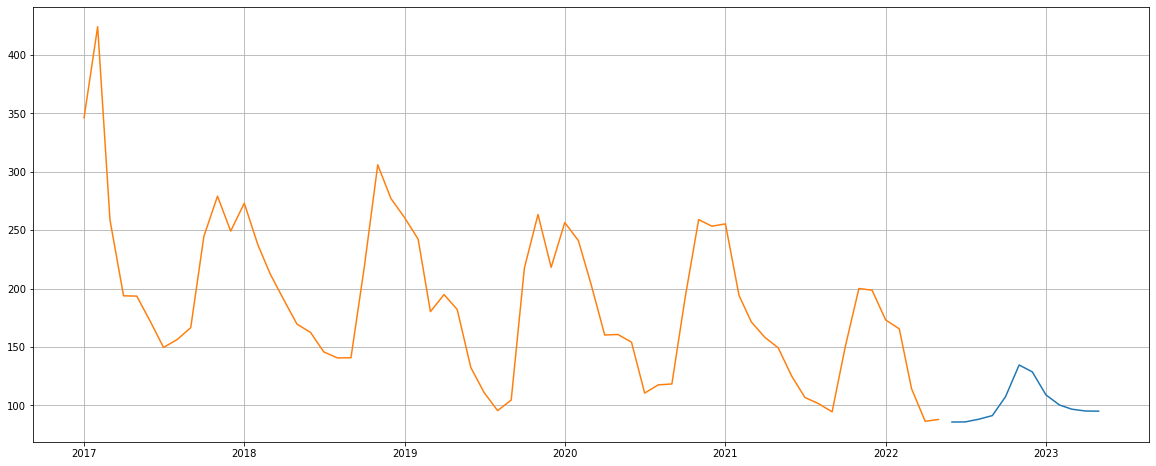

In [78]:
plt.figure(figsize=(20,8))
plt.grid(True)
plt.plot( true_preds['Forecast'])
plt.plot( Srilankan_AQI['y'])

### Save model 

In [79]:
import pickle
with open('forecast.pickle', 'wb') as file:
    pickle.dump(true_preds, file)

In [83]:
true_preds=pd.DataFrame(true_predictions,columns=['Forecast'])
true_preds=true_preds.set_index(pd.date_range('2022-10-01',periods=12,freq='MS'))

In [84]:
true_preds

,Forecast
2022-10-01,85.731527
2022-11-01,85.821797
2022-12-01,88.138496
2023-01-01,91.246693
2023-02-01,107.430711
2023-03-01,134.586398
2023-04-01,128.673733
2023-05-01,108.997613
2023-06-01,100.306386
2023-07-01,96.736476
